## Three-Fund Portfolio
A three-fund portfolio is a portfolio which uses only basic asset classes — usually a domestic stock "total market" index fund, an international stock "total market" index fund and a bond "total market" index fund. It is often recommended for and by Bogleheads attracted by "the majesty of simplicity" (John Bogle's phrase), and for those who want finer control and better tax-efficiency than they would get in an all-in-one fund like a target retirement fund.
[Bogleheads wiki](https://www.bogleheads.org/wiki/Three-fund_portfolio)


In [1]:
#funds dictionary(tickr, %age)
three_funds_vanguard={
    'VTI': 70, 
    'VXUS': 20, 
    'BND': 10
}
initial_investment = 10000

### Histrocial performance

In [23]:
from datetime import date, timedelta

start_date = date(2012, 1, 1)
end_date = date(2024, 1, 1)
# difference between current and previous date
delta = timedelta(days=1)

# store the dates between two dates in a list
dates = []
values = []

while start_date <= end_date:
    # add current date to list by converting  it to iso format
    dates.append(start_date.isoformat())
    # increment start date by timedelta
    start_date += delta

#print(dates)
# print(dates[0], dates[-1])
tickers = ''
for fund in three_funds_vanguard.keys(): 
    tickers = tickers + ' '+ fund
data = yf.download(tickers, str(dates[0]), str(dates[-1]))

print(data['Close']['VTI'])
# for d in data['Close']: 
#     print(d)

[*********************100%%**********************]  3 of 3 completed

Date
2012-01-03     65.209999
2012-01-04     65.239998
2012-01-05     65.529999
2012-01-06     65.379997
2012-01-09     65.529999
                 ...    
2023-12-22    236.630005
2023-12-26    237.800003
2023-12-27    238.250000
2023-12-28    238.130005
2023-12-29    237.220001
Name: VTI, Length: 3018, dtype: float64


In [ ]:
### Plot the growth of this portfolio

[*********************100%%**********************]  1 of 1 completed


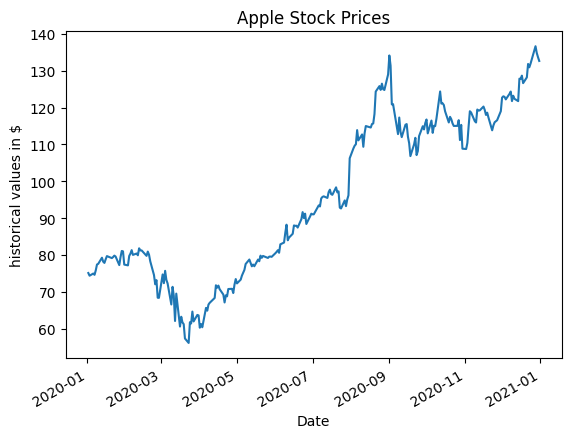

In [5]:
import yfinance as yf
import matplotlib.pyplot as plt
import numpy as np

# xpoints = np.array(dates)
# ypoints = np.array(values)
# plt.plot(xpoints, ypoints)


plt.xlabel('time period')
plt.ylabel('historical values in $')
plt.grid(True)

data = yf.download("AAPL", start="2020-01-01", end="2021-01-01")
data['Close'].plot()
plt.title("Apple Stock Prices")
plt.show()